In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_extraction import read_dataset
from curve_fitting import least_squares
from curve_fitting import MCMC

In [2]:
type_1a = read_dataset('type_1a.txt')
SDSS = read_dataset('SDSS_lum_distance_cepheids.csv')
leda = read_dataset('leda_distance.csv')

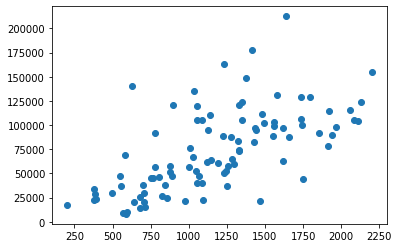

In [3]:
plt.scatter(type_1a[0], type_1a[2])

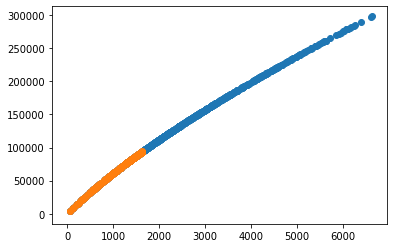

In [11]:
#SDSS[0], SDSS[2] = (list(t) for t in zip(*sorted(zip(SDSS[0], SDSS[2]))))
plt.scatter(SDSS[0], SDSS[2])
plt.scatter(SDSS[0][:int(0.25*len(SDSS[0]))], SDSS[2][:int(0.25*len(SDSS[2]))])

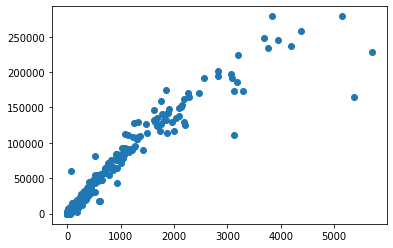

In [5]:
plt.scatter(leda[0], leda[2])

In [ ]:
for i in range(len(leda[2])):
    if np.isnan(leda[2][i]):
        print (i)

In [14]:
lst_sol_type_1a = least_squares(type_1a[0], type_1a[2])
lst_sol_SDSS = least_squares(SDSS[0][:int(0.5*len(SDSS[0]))], SDSS[2][:int(0.5*len(SDSS[2]))])
lst_sol_leda = least_squares(leda[0], leda[2])
print(lst_sol_type_1a, lst_sol_SDSS, lst_sol_leda)

[  57.63587467 6326.43891908] [  52.45234557 7579.7620279 ] [ 62.97767891 701.17845909]


In [15]:
sampler_type1a = MCMC(50, 2, [50,3000], type_1a[0], type_1a[2], np.var(type_1a[2]))
sampler_SDSS = MCMC(50, 2, [50,3000], SDSS[0][:int(0.5*len(SDSS[0]))], SDSS[2][:int(0.5*len(SDSS[2]))], np.var(SDSS[2][:int(0.5*len(SDSS[2]))]))
sampler_leda = MCMC(50, 2, [50,3000], leda[0], leda[2], np.var(leda[2]))

100%|██████████| 2000/2000 [00:04<00:00, 423.79it/s]


No handles with labels found to put in legend.


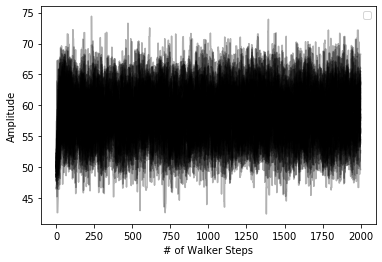

No handles with labels found to put in legend.


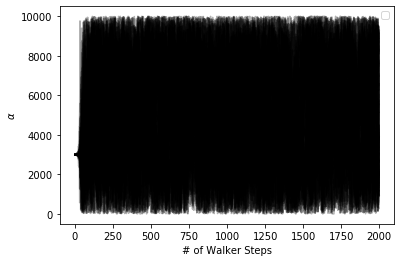

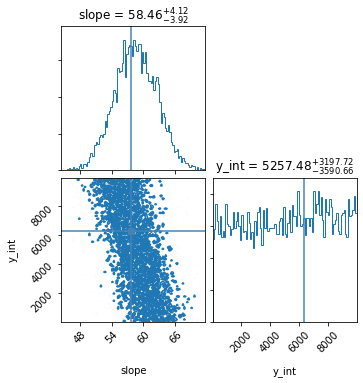

In [16]:
plt.plot(sampler_type1a[0].chain[:,:,0].T, '-', color='k', alpha=0.3)
plt.xlabel('# of Walker Steps')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.plot(sampler_type1a[0].chain[:,:,1].T, '-', color='k', alpha=0.3)
plt.xlabel('# of Walker Steps')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.show()

import corner
flat_samples = sampler_type1a[0].get_chain(discard=100, thin = 15, flat=True)
fig = corner.corner(flat_samples,bins=100,color='C0',smooth=0.01,plot_datapoints=False,plot_density=True,plot_contours=True,fill_contour=False,show_titles=True,labels=['slope','y_int'], 
                truths=[lst_sol_type_1a[0], lst_sol_type_1a[1]])

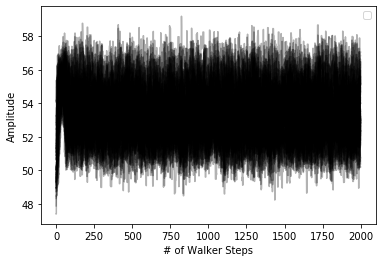

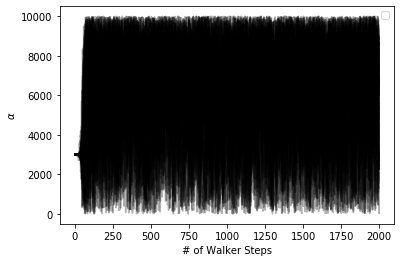

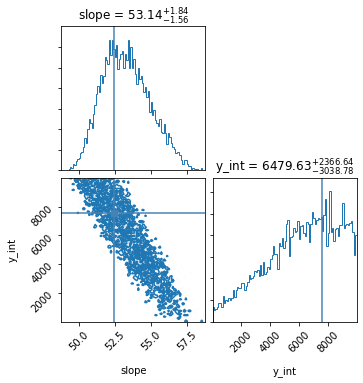

In [17]:
plt.plot(sampler_SDSS[0].chain[:,:,0].T, '-', color='k', alpha=0.3)
plt.xlabel('# of Walker Steps')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.plot(sampler_SDSS[0].chain[:,:,1].T, '-', color='k', alpha=0.3)
plt.xlabel('# of Walker Steps')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.show()

import corner
flat_samples = sampler_SDSS[0].get_chain(discard=100, thin = 15, flat=True)
fig = corner.corner(flat_samples,bins=100,color='C0',smooth=0.01,plot_datapoints=False,plot_density=True,plot_contours=True,fill_contour=False,show_titles=True,labels=['slope','y_int'], 
                truths=[lst_sol_SDSS[0], lst_sol_SDSS[1]])

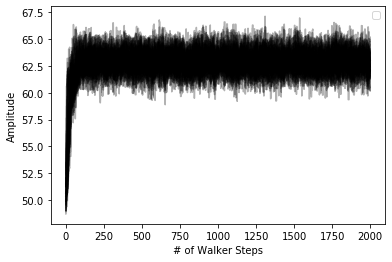

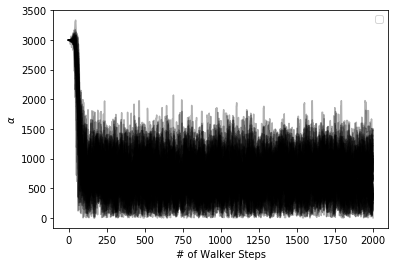

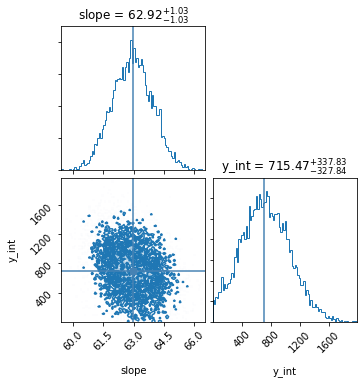

In [18]:
plt.plot(sampler_leda[0].chain[:,:,0].T, '-', color='k', alpha=0.3)
plt.xlabel('# of Walker Steps')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.plot(sampler_leda[0].chain[:,:,1].T, '-', color='k', alpha=0.3)
plt.xlabel('# of Walker Steps')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.show()

import corner
flat_samples = sampler_leda[0].get_chain(discard=100, thin = 15, flat=True)
fig = corner.corner(flat_samples,bins=100,color='C0',smooth=0.01,plot_datapoints=False,plot_density=True,plot_contours=True,fill_contour=False,show_titles=True,labels=['slope','y_int'], 
                truths=[lst_sol_leda[0], lst_sol_leda[1]])



In [22]:
x_filtered = []
y_filtered = []

x_avg = np.average(leda[0])
x_std = np.std(leda[0])
y_avg = np.average(leda[2])
y_std = np.std(leda[2])

x = leda[0]
y = leda[2]

i = 0
while i < len(x) - 1:
    if (x[i] <= x_avg + x_std 
        and x[i] >= x_avg - x_std 
        and y[i] <= y_avg + y_std 
        and y[i] >= y_avg - y_std):
            x_filtered.append(x[i])
            y_filtered.append(y[i])
    i+=1
    
x_filtered = np.array(x_filtered)
y_filtered = np.array(y_filtered)

In [23]:
sampler_leda = MCMC(50, 2, [50,3000], x_filtered, y_filtered, np.var(x_filtered))

100%|██████████| 2000/2000 [00:04<00:00, 410.97it/s]


In [24]:
lst_sol_leda = least_squares(x_filtered, y_filtered)

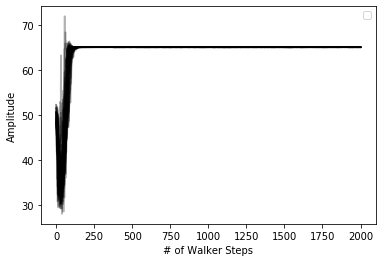

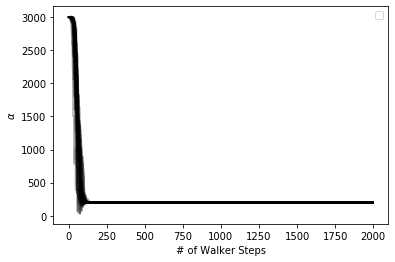

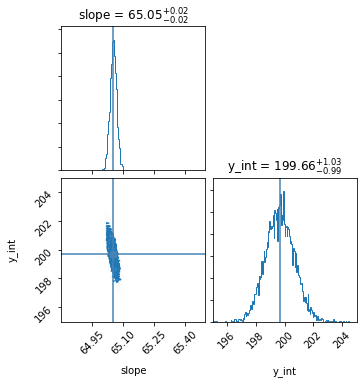

In [33]:
plt.plot(sampler_leda[0].chain[:,:,0].T, '-', color='k', alpha=0.3)
plt.xlabel('# of Walker Steps')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.plot(sampler_leda[0].chain[:,:,1].T, '-', color='k', alpha=0.3)
plt.xlabel('# of Walker Steps')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.show()

import corner
flat_samples = sampler_leda[0].get_chain(discard=100, thin = 15, flat=True)
fig = corner.corner(flat_samples,bins=200,color='C0',smooth=0.01,plot_datapoints=False,plot_density=True,plot_contours=True,fill_contour=False,show_titles=True,labels=['slope','y_int'], 
                truths=[lst_sol_leda[0], lst_sol_leda[1]], range = ([64.8, 65.5], [195, 205]))

In [ ]:
ls

In [ ]:
type_1a = read_dataset('type_1a.txt')

In [ ]:
var = np.var(type_1a[2])

In [ ]:
plt.scatter(type_1a[0], type_1a[2])
x = np.linspace(0, 2250, 1000)
y = np.linspace(0, 200000, 1000)
plt.plot(x, 57.64*x + 6326)

In [ ]:
lst_sol = least_squares(type_1a[0], type_1a[2])
lst_sol

In [ ]:
sampler = MCMC(50, 2, [50,3000], type_1a[0], type_1a[2], np.var(type_1a[2]))

In [ ]:
sampler[0]

In [ ]:
plt.plot(sampler[0].chain[:,:,0].T, '-', color='k', alpha=0.3)
plt.xlabel('# of Walker Steps')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.plot(sampler[0].chain[:,:,1].T, '-', color='k', alpha=0.3)
plt.xlabel('# of Walker Steps')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.show()

import corner
flat_samples = sampler[0].get_chain(discard=100, thin = 15, flat=True)
fig = corner.corner(flat_samples,bins=100,color='C0',smooth=0.01,plot_datapoints=False,plot_density=True,plot_contours=True,fill_contour=False,show_titles=True,labels=['slope','y_int'], 
                truths=[lst_sol[0], lst_sol[1]])




In [ ]:
import emcee
Nwalker,Ndim = 50,2
initial = [100,3000]
p0 = [initial+1.e-4*np.random.randn(Ndim) for i in range(Nwalker)]
sampler = emcee.EnsembleSampler(Nwalker,Ndim,lnprob,
                                args=(type_1a[0], type_1a[2], type_1a[3]))
pos,prob,state = sampler.run_mcmc(p0, 2000, progress = True)

In [ ]:
plt.plot(sampler.chain[:,:,0].T, '-', color='k', alpha=0.3)
plt.xlabel('# of Walker Steps')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.plot(sampler.chain[:,:,1].T, '-', color='k', alpha=0.3)
plt.xlabel('# of Walker Steps')
plt.ylabel(r'$\alpha$')
plt.legend()
plt.show()

import corner
flat_samples = sampler.get_chain(discard=100, thin = 15, flat=True)
fig = corner.corner(flat_samples, labels=['slope', 'y_int'], truths=[58, 6000])

In [ ]:
# Initial m,b guess
m = 2.
b = 20.
# m,b step sizes (proposal distribution)
step_m = 0.1
step_b = 1.

# How many MCMC steps?
steps = 10000

# Read the data
(x, y, sigmay) = type_1a[0], type_1a[2]*299792, type_1a[3]

chain = []
probs = []

for i in range(steps):
    # Draw from the proposal distribution (take a step)
    # mnew = draw from a gaussian distribution with mean m and std step_m
    # bnew = draw from a gaussian distribution with mean b and std step_b
    #   Hint: draw a Gaussian random value with np.random.normal()

    # Evaluate the posterior probability at the new step
    # prob_new = straight_line_gaussian_likelihood( ... )

    # Evaluate the old posterior probability...
    # prob_old = straight_line_gaussian_likelihood( ... )

    # Compare new posterior to old posterior, decide whether to accept
    #   Hint: draw a uniform random value with np.random.uniform()
    # if prob_new > prob_old or ...:
        # accept!
        # m = mnew
        # b = bnew
        # prob = prob_new
    # else:
        # prob = prob_old

    # Record current position
    chain.append((m,b))
    # Record current probability
    #probs.append(prob)

mm = [m for m,b in chain]
bb = [b for m,b in chain]

besti = np.argmax(probs)
bestm = mm[besti]
bestb = bb[besti]

In [ ]:

plt.clf()
plt.plot(mm, bb, 'b.')
plt.plot(bestm, bestb, 'ro')
plt.savefig('p3-scatter.png')

plt.clf()
plt.subplot(2,1,1)
plt.plot(mm, 'k-')
plt.ylabel('m')
plt.subplot(2,1,2)
plt.plot(bb, 'k-')
plt.ylabel('b')
plt.savefig('p3-track.png')

import triangle
plt.clf()
triangle.corner(chain, labels=['m', 'b'],
                truths=[bestm,bestb])
plt.savefig('p3-tri.png')